# Target Values: Bullish, Neutral and Bearish (3 classes)

# Load Data

**Target Variables of Interest:**
</br>**MTrend** - Monthly price %change with 5 classes
</br>**MTrend2** - Monthly price %change with 3 classes
</br>**QTrend** - Quarterly price %change with 5 classes
</br>**QTrend2** - Quarterly price %change with 3 classes

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Model and performance
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold, GridSearchCV # tuning hyperparameters
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler

# Ensembled sampling
#from imblearn.under_sampling import NearMiss
#from imblearn.over_sampling import SMOTE
#from imblearn.ensemble import BalancedRandomForestClassifier
#from imblearn.ensemble import RUSBoostClassifier
#from imblearn.ensemble import EasyEnsembleClassifier
#from imblearn.ensemble import BalancedBaggingClassifier
#from xgboost import XGBRFClassifier

sns.set()
%matplotlib inline

In [54]:
df_sp_raw = pd.read_csv('sp500_final_monthly.csv')

In [55]:
df_sp_raw.head(5)

,Date,PriceValue,key,ShillerPERatio,Earnings,TreasuryRate,Unemployment,CPI,USRealGDP,PriceDiff,ShillerPERatioDiff,EarningsDiff,TreasuryRateDiff,UnemploymentDiff,CPIDiff,USRealGDPDiff,MTrend
0,1948-02-01,14.10,1948-02,10.00,21.64,2.43,3.8,23.5,2.09,-0.049225,-0.42,0.029006,-0.01,0.4,-0.008439,0.000000,Bearish
1,1948-03-01,14.30,1948-03,10.19,22.17,2.42,4.0,23.4,2.09,0.014184,0.19,0.024492,-0.01,0.2,-0.004255,0.000000,Neutral
2,1948-04-01,15.40,1948-04,10.78,22.43,2.41,3.9,23.8,2.09,0.076923,0.59,0.011728,-0.01,-0.1,0.017094,0.000000,Bullish
3,1948-05-01,16.15,1948-05,11.24,22.97,2.40,3.5,23.9,2.09,0.048701,0.46,0.024075,-0.01,-0.4,0.004202,0.000000,Bullish
4,1948-06-01,16.82,1948-06,11.58,23.41,2.39,3.6,24.1,2.12,0.041486,0.34,0.019155,-0.01,0.1,0.008368,0.014354,Bullish


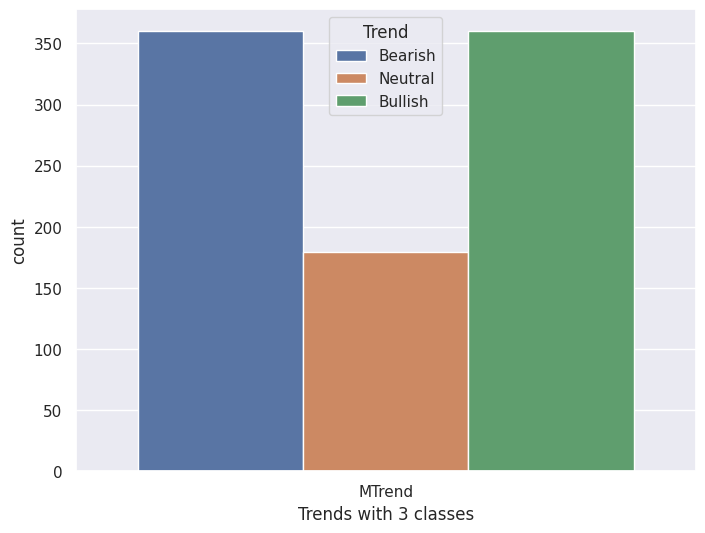

In [56]:
plt.figure(figsize = (8, 6))

df_trends_3classes = df_sp_raw[['MTrend']]
df1 = df_trends_3classes.melt(var_name = 'Trends with 3 classes', value_name = 'Trend')
sns.countplot(x = 'Trends with 3 classes', hue = 'Trend', data = df1)

plt.show()

## Subset data by Period

In [57]:
print(df_sp_raw.keys())
df_sp_raw.set_index('key', inplace = True)

Index(['Date', 'PriceValue', 'key', 'ShillerPERatio', 'Earnings',
       'TreasuryRate', 'Unemployment', 'CPI', 'USRealGDP', 'PriceDiff',
       'ShillerPERatioDiff', 'EarningsDiff', 'TreasuryRateDiff',
       'UnemploymentDiff', 'CPIDiff', 'USRealGDPDiff', 'MTrend'],
      dtype='object')


In [58]:
df_sp_raw

,Date,PriceValue,ShillerPERatio,Earnings,TreasuryRate,Unemployment,CPI,USRealGDP,PriceDiff,ShillerPERatioDiff,EarningsDiff,TreasuryRateDiff,UnemploymentDiff,CPIDiff,USRealGDPDiff,MTrend
key,,,,,,,,,,,,,,,,
1948-02,1948-02-01,14.10,10.00,21.64,2.43,3.8,23.50,2.09,-0.049225,-0.42,0.029006,-0.01,0.4,-0.008439,0.000000,Bearish
1948-03,1948-03-01,14.30,10.19,22.17,2.42,4.0,23.40,2.09,0.014184,0.19,0.024492,-0.01,0.2,-0.004255,0.000000,Neutral
1948-04,1948-04-01,15.40,10.78,22.43,2.41,3.9,23.80,2.09,0.076923,0.59,0.011728,-0.01,-0.1,0.017094,0.000000,Bullish
1948-05,1948-05-01,16.15,11.24,22.97,2.40,3.5,23.90,2.09,0.048701,0.46,0.024075,-0.01,-0.4,0.004202,0.000000,Bullish
1948-06,1948-06-01,16.82,11.58,23.41,2.39,3.6,24.10,2.12,0.041486,0.34,0.019155,-0.01,0.1,0.008368,0.014354,Bullish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08,2022-08-01,4158.56,30.70,193.39,2.90,3.7,296.17,19.90,0.063100,1.70,-0.008714,0.00,0.2,-0.000371,0.000000,Bullish
2022-09,2022-09-01,3850.52,28.23,191.21,3.52,3.5,296.81,20.05,-0.074074,-2.47,-0.011273,0.62,-0.2,0.002161,0.007538,Bearish
2022-10,2022-10-01,3726.05,27.08,185.58,3.98,3.7,298.01,20.05,-0.032326,-1.15,-0.029444,0.46,0.2,0.004043,0.000000,Bearish


In [59]:
##### SELECT THE VARIABLES HERE ACCORDINGLY #####
df_monthly_orig = df_sp_raw[['Date', 'ShillerPERatio', 'Earnings',
       'TreasuryRate', 'Unemployment', 'CPI', 'USRealGDP', 'MTrend']]

df_monthly = df_sp_raw[['Date', 'ShillerPERatioDiff', 'EarningsDiff', 'TreasuryRateDiff',
                       'UnemploymentDiff', 'CPIDiff', 'USRealGDPDiff', 'MTrend']]


<Axes: xlabel='MTrend', ylabel='count'>

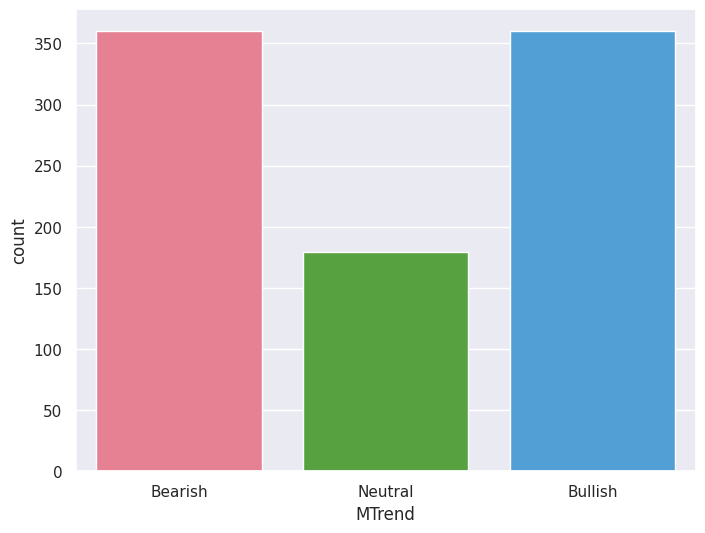

In [60]:
figure, axis = plt.subplots(figsize = (8, 6))

df_monthly_mcr = df_monthly[['Date', 'ShillerPERatioDiff','EarningsDiff','MTrend']]
sns.countplot(data = df_monthly_mcr, x = "MTrend", palette = "husl", ax = axis)


# Splitting the Data (Train and Test)

In [61]:
#split the data but maintain all "diff" vars
#drop MTrend and Date
#then perform feature importance
df_monthly_mcr.head()

,Date,ShillerPERatioDiff,EarningsDiff,MTrend
key,,,,
1948-02,1948-02-01,-0.42,0.029006,Bearish
1948-03,1948-03-01,0.19,0.024492,Neutral
1948-04,1948-04-01,0.59,0.011728,Bullish
1948-05,1948-05-01,0.46,0.024075,Bullish
1948-06,1948-06-01,0.34,0.019155,Bullish


In [62]:
df_monthly.head()

,Date,ShillerPERatioDiff,EarningsDiff,TreasuryRateDiff,UnemploymentDiff,CPIDiff,USRealGDPDiff,MTrend
key,,,,,,,,
1948-02,1948-02-01,-0.42,0.029006,-0.01,0.4,-0.008439,0.000000,Bearish
1948-03,1948-03-01,0.19,0.024492,-0.01,0.2,-0.004255,0.000000,Neutral
1948-04,1948-04-01,0.59,0.011728,-0.01,-0.1,0.017094,0.000000,Bullish
1948-05,1948-05-01,0.46,0.024075,-0.01,-0.4,0.004202,0.000000,Bullish
1948-06,1948-06-01,0.34,0.019155,-0.01,0.1,0.008368,0.014354,Bullish


In [63]:
X_train = df_monthly[df_monthly['Date'] < '2018-01-01' ]
Y_train = X_train['MTrend']
X_train = X_train.drop(['MTrend', 'Date'], axis=1) #only then should I drop MTrend and Date columns from X_Train

X_test = df_monthly[df_monthly['Date'] >= '2018-01-01']
Y_test = X_test['MTrend']
X_test = X_test.drop(['Date', 'MTrend'], axis=1)

In [64]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

839
839
60
60


# Model 1: RandomForest Classifier (All Vars)

In [65]:

from sklearn.ensemble import RandomForestClassifier

rf_gs = RandomForestClassifier(n_jobs = -1, random_state=3)

#you may also try 10 for n_splits since we have small data
#I dont understand why the smaller the data, the higher the n_split (or fold or subset) should be.
# n_repeats may be 3 or 5 for small datasets
cv3 = RepeatedKFold(n_splits=5, n_repeats=3, random_state=3)

# define parameters
param1 = {
    'criterion':['gini', 'entropy'],
    'n_estimators':[100, 150, 200],
    'max_depth': [5,10,20,30],
    'max_features': ['sqrt', 'log2']
}

# define search
rf_search = GridSearchCV(rf_gs, param1, scoring='accuracy', n_jobs=-1, cv=cv3)
# execute Gridsearch
rf_result = rf_search.fit(X_train, Y_train)

# summarize result (X: PEShillerRatio and Earnings)
print('RF Model (2 classes - PEShillerRatio&Earnings_Monthly) Best Score: %s' % rf_result.best_score_)
print('RF Model (2 classes - PEShillerRatio&Earnings_Monthly) Best Hyperparameters: %s' % rf_result.best_params_)
print(X_train.keys())


RF Model (2 classes - PEShillerRatio&Earnings_Monthly) Best Score: 0.9125986122992111
RF Model (2 classes - PEShillerRatio&Earnings_Monthly) Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}
Index(['ShillerPERatioDiff', 'EarningsDiff', 'TreasuryRateDiff',
       'UnemploymentDiff', 'CPIDiff', 'USRealGDPDiff'],
      dtype='object')


Optimal Hyperparameter values: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}
Cross validation accuracy score 0.893 +/- 0.015



RandomForestClassifier Model Accuracy: 0.8666666666666667

Classification Report 
              precision    recall  f1-score   support

     Bearish       0.81      1.00      0.90        22
     Bullish       0.93      0.96      0.95        27
     Neutral       0.80      0.36      0.50        11

    accuracy                           0.87        60
   macro avg       0.85      0.78      0.78        60
weighted avg       0.86      0.87      0.85        60


Confusion Matrix 
[[22  0  0]
 [ 0 26  1]
 [ 5  2  4]]


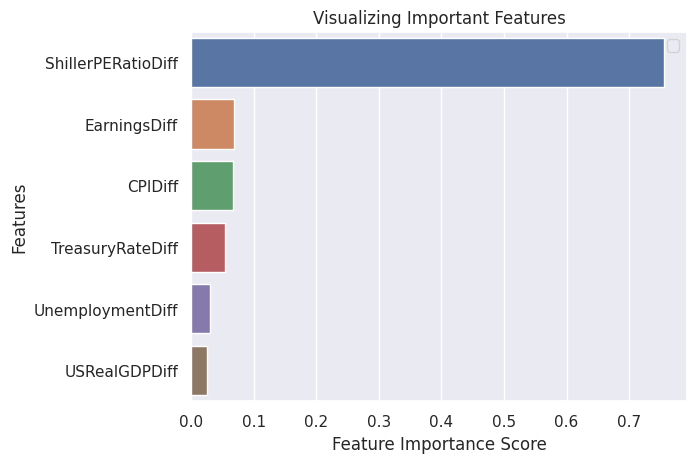

In [66]:

# Use optimal Hyperparameter values
GS_rf = rf_result.best_params_
print(f"Optimal Hyperparameter values: {GS_rf}")

rf = RandomForestClassifier(criterion=GS_rf['criterion'], max_depth=GS_rf['max_depth'], max_features = GS_rf['max_features'],n_estimators=GS_rf['n_estimators'], random_state=3)

# cross validation
rf_cv_res = cross_validate(rf, X_train, Y_train, cv = 5, n_jobs = -1, scoring="accuracy")

# Check the model performance
print(f"Cross validation accuracy score {rf_cv_res['test_score'].mean():.3f} +/- {rf_cv_res['test_score'].std():.3f}")

#fit model
rf.fit(X_train, Y_train)
rf_ypred=rf.predict(X_test)

print("\nRandomForestClassifier Model Accuracy:",metrics.accuracy_score(Y_test, rf_ypred))

# check scores and confusion matrix
print(f"\nClassification Report \n{classification_report(Y_test, rf_ypred)}")
print(f"\nConfusion Matrix \n{confusion_matrix(Y_test,rf_ypred)}")


# We can simply remove this because feature importance should come first before gridsearchcv
# Finding important features
feature_imp = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feature_imp

# Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()



In [67]:
# Using Random Forest feature importance, we can see that EarningsDiff and ShillerPERatio gives the highest score.
# Although RF can deal with high dimensionality, we will only take two highest important feature

# Splitting Data for Two variables

In [68]:
# ----- Now split the data ------
### MONTHLY DF
X_train_1 = df_monthly_mcr[df_monthly_mcr['Date'] < '2018-01-01']
Y_train_1 = X_train_1['MTrend']
X_train_1 = X_train_1.drop(['Date', 'MTrend'], axis=1)

X_test_1 = df_monthly_mcr[df_monthly_mcr['Date'] >= '2018-01-01']
Y_test_1 = X_test_1['MTrend']
X_test_1 = X_test_1.drop(['Date', 'MTrend'], axis=1)


In [69]:
# Number of data points in each train/test dataset
print(len(X_train_1))
print(len(Y_train_1))

print(len(X_test_1))
print(len(Y_test_1))


839
839
60
60


In [70]:
X_train_1

,ShillerPERatioDiff,EarningsDiff
key,,
1948-02,-0.42,0.029006
1948-03,0.19,0.024492
1948-04,0.59,0.011728
1948-05,0.46,0.024075
1948-06,0.34,0.019155
...,...,...
2017-08,-0.09,0.006683
2017-09,0.26,0.004273
2017-10,0.75,0.009346


In [71]:
Y_train_1.value_counts()

Bearish    338
Bullish    333
Neutral    168
Name: MTrend, dtype: int64

In [72]:
X_test_1

,ShillerPERatioDiff,EarningsDiff
key,,
2018-01,1.22,0.011390
2018-02,-1.27,0.011993
2018-03,-0.23,0.014018
2018-04,-0.84,0.016319
2018-05,0.27,0.015706
2018-06,0.39,0.017879
2018-07,0.26,0.021431
2018-08,0.50,0.020517
2018-09,0.23,0.019453


In [73]:
Y_test_1.value_counts()

Bullish    27
Bearish    22
Neutral    11
Name: MTrend, dtype: int64

# Model 2: RandomForestClassifier (ShillerPERatio and Earnings)

### GridSearchCV Definition

In [74]:
### can be deleted bec we already had GridSearch earlier

from sklearn.ensemble import RandomForestClassifier

rf_gs = RandomForestClassifier(n_jobs = -1, random_state=3)

# Try 10 for n_splits since we have small data
# The smaller the data, the higher the n_split (or fold or subset) should be.
# n_repeats may be 3 or 5 for small datasets
cv3 = RepeatedKFold(n_splits=5, n_repeats=3, random_state=3)

# define parameters
param1 = {
    'criterion':['gini', 'entropy'],
    'n_estimators':[100, 150, 200],
    'max_depth': [5,10,20,30],
    'max_features': ['sqrt', 'log2']
}

# define search
rf_search = GridSearchCV(rf_gs, param1, scoring='accuracy', n_jobs=-1, cv=cv3)

#### GridSearchCV Execution & Results

In [75]:
# Define train and test data [Update correspondingly]
#X_train1 = X_train
#y_train1 = y_train
#X_test1 = X_test
#y_test1 = y_test

# execute Gridsearch
rf_result1 = rf_search.fit(X_train_1, Y_train_1)

# summarize result (X: PEShillerRatio and Earnings)
print('RF Model (2 classes - PEShillerRatio&Earnings_Monthly) Best Score: %s' % rf_result1.best_score_)
print('RF Model (2 classes - PEShillerRatio&Earnings_Monthly) Best Hyperparameters: %s' % rf_result1.best_params_)
print(X_train_1.keys())

RF Model (2 classes - PEShillerRatio&Earnings_Monthly) Best Score: 0.8947129550422963
RF Model (2 classes - PEShillerRatio&Earnings_Monthly) Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 150}
Index(['ShillerPERatioDiff', 'EarningsDiff'], dtype='object')


#### Cross-validation and Model Fitting

Optimal Hyperparameter values: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 150}
Cross validation accuracy score 0.883 +/- 0.024



RandomForestClassifier Model Accuracy: 0.8833333333333333

Classification Report 
              precision    recall  f1-score   support

     Bearish       0.81      1.00      0.90        22
     Bullish       0.96      0.96      0.96        27
     Neutral       0.83      0.45      0.59        11

    accuracy                           0.88        60
   macro avg       0.87      0.81      0.82        60
weighted avg       0.88      0.88      0.87        60


Confusion Matrix 
[[22  0  0]
 [ 0 26  1]
 [ 5  1  5]]


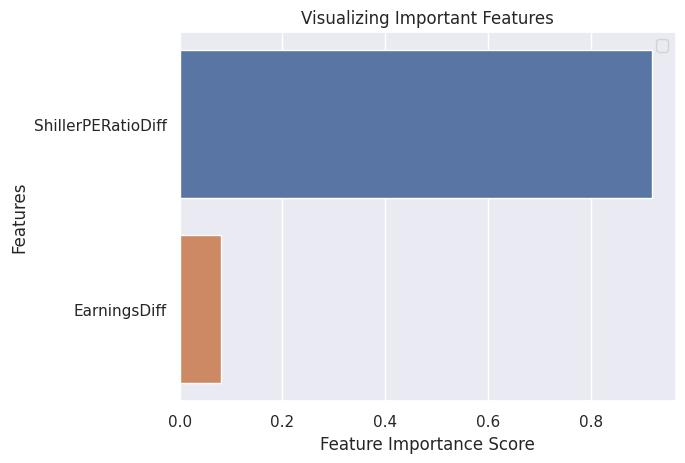

In [76]:


# Use optimal Hyperparameter values
GS_rf = rf_result1.best_params_
print(f"Optimal Hyperparameter values: {GS_rf}")

rf = RandomForestClassifier(criterion=GS_rf['criterion'], max_depth=GS_rf['max_depth'], max_features = GS_rf['max_features'],n_estimators=GS_rf['n_estimators'], random_state=3)

# cross validation
rf_cv_res = cross_validate(rf, X_train_1, Y_train_1, cv = 5, n_jobs = -1, scoring="accuracy")

# Check the model performance
print(f"Cross validation accuracy score {rf_cv_res['test_score'].mean():.3f} +/- {rf_cv_res['test_score'].std():.3f}")

#fit model
rf.fit(X_train_1, Y_train_1)
rf_ypred1=rf.predict(X_test_1)

print("\nRandomForestClassifier Model Accuracy:",metrics.accuracy_score(Y_test_1, rf_ypred1))

# check scores and confusion matrix
print(f"\nClassification Report \n{classification_report(Y_test_1, rf_ypred1)}")
print(f"\nConfusion Matrix \n{confusion_matrix(Y_test_1,rf_ypred1)}")


# We can simply remove this because feature importance should come first before gridsearchcv
# Finding important features
feature_imp = pd.Series(rf.feature_importances_, index = X_train_1.columns).sort_values(ascending = False)
feature_imp

# Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


# Original data

In [77]:
df_monthly_orig.head()

,Date,ShillerPERatio,Earnings,TreasuryRate,Unemployment,CPI,USRealGDP,MTrend
key,,,,,,,,
1948-02,1948-02-01,10.00,21.64,2.43,3.8,23.5,2.09,Bearish
1948-03,1948-03-01,10.19,22.17,2.42,4.0,23.4,2.09,Neutral
1948-04,1948-04-01,10.78,22.43,2.41,3.9,23.8,2.09,Bullish
1948-05,1948-05-01,11.24,22.97,2.40,3.5,23.9,2.09,Bullish
1948-06,1948-06-01,11.58,23.41,2.39,3.6,24.1,2.12,Bullish


In [78]:
# split data by assigning x and y then dropping date on x

X_train_o = df_monthly_orig[df_monthly_orig['Date'] < '2018-01-01' ]
Y_train_o = X_train_o['MTrend']
X_train_o = X_train_o.drop(['Date', 'MTrend'], axis=1)

X_test_o = df_monthly_orig[df_monthly_orig['Date'] >= '2018-01-01']
Y_test_o = X_test_o['MTrend']
X_test_o = X_test_o.drop(['Date', 'MTrend'], axis =1)

In [79]:
print(len(X_train_o))
print(len(Y_train_o))
print(len(X_test_o))
print(len(Y_test_o))


839
839
60
60


# Gridsearch execution and results

In [80]:
# execute Gridsearch
rf_result_o = rf_search.fit(X_train_o, Y_train_o)

# summarize result (X: PEShillerRatio and Earnings)
print('RF Model (2 classes - PEShillerRatio&Earnings_Monthly) Best Score: %s' % rf_result_o.best_score_)
print('RF Model (2 classes - PEShillerRatio&Earnings_Monthly) Best Hyperparameters: %s' % rf_result_o.best_params_)
print(X_train_1.keys())

RF Model (2 classes - PEShillerRatio&Earnings_Monthly) Best Score: 0.45491398156068813
RF Model (2 classes - PEShillerRatio&Earnings_Monthly) Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 150}
Index(['ShillerPERatioDiff', 'EarningsDiff'], dtype='object')


## Cross Validation and model fitting

Optimal Hyperparameter values: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 150}
Cross validation accuracy score 0.318 +/- 0.064

RandomForestClassifier Model Accuracy: 0.3333333333333333

Classification Report 
              precision    recall  f1-score   support

     Bearish       0.50      0.05      0.08        22
     Bullish       0.41      0.44      0.43        27
     Neutral       0.24      0.64      0.35        11

    accuracy                           0.33        60
   macro avg       0.39      0.38      0.29        60
weighted avg       0.41      0.33      0.29        60


Confusion Matrix 
[[ 1 13  8]
 [ 1 12 14]
 [ 0  4  7]]


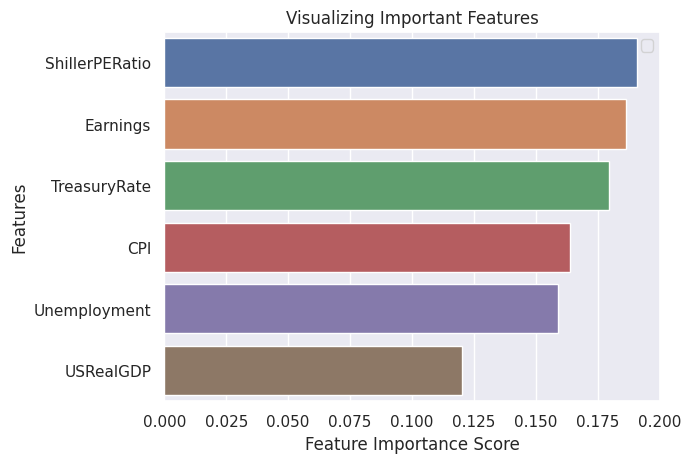

In [81]:

# Use optimal Hyperparameter values
GS_rf = rf_result_o.best_params_
print(f"Optimal Hyperparameter values: {GS_rf}")

rf = RandomForestClassifier(criterion=GS_rf['criterion'], max_depth=GS_rf['max_depth'], max_features = GS_rf['max_features'],n_estimators=GS_rf['n_estimators'], random_state=3)

# cross validation
rf_cv_res = cross_validate(rf, X_train_o, Y_train_o, cv = 5, n_jobs = -1, scoring="accuracy")

# Check the model performance
print(f"Cross validation accuracy score {rf_cv_res['test_score'].mean():.3f} +/- {rf_cv_res['test_score'].std():.3f}")

#fit model
rf.fit(X_train_o, Y_train_o)
rf_ypred_o=rf.predict(X_test_o)

print("\nRandomForestClassifier Model Accuracy:",metrics.accuracy_score(Y_test_o, rf_ypred_o))

# check scores and confusion matrix
print(f"\nClassification Report \n{classification_report(Y_test_o, rf_ypred_o)}")
print(f"\nConfusion Matrix \n{confusion_matrix(Y_test_o,rf_ypred_o)}")


# We can simply remove this because feature importance should come first before gridsearchcv
# Finding important features
feature_imp = pd.Series(rf.feature_importances_, index = X_train_o.columns).sort_values(ascending = False)
feature_imp

# Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# Based on the results above, original variables will not result to good accuracy